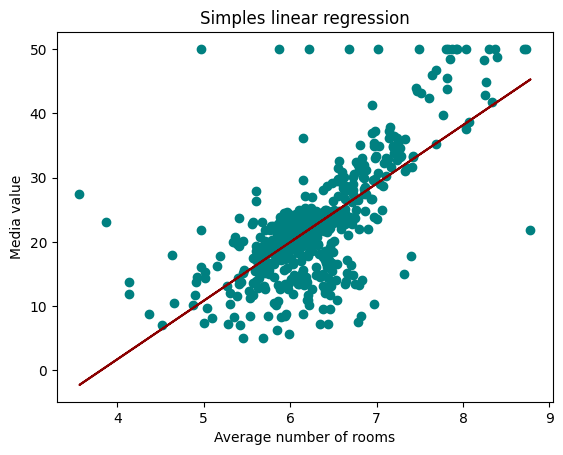

In [ ]:
# 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml

# Prepare data
boston = fetch_openml('boston', version=1, parser='auto')
df = pd.DataFrame(boston.data, columns=boston.feature_names)
x = df[['RM']]
y = boston.target

# Fit model
model = LinearRegression()
model.fit(x, y)

# Plot
plt.scatter(x, y, color='teal')
plt.plot(x, model.predict(x), color='darkred')
plt.xlabel('Average number of rooms')
plt.ylabel('Media value')
plt.title('Simples linear regression')
plt.show()

In [ ]:
# 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml

# Prepare data
boston = fetch_openml('boston', version=1, parser='auto')
df = pd.DataFrame(boston.data, columns=boston.feature_names)
x = df[['RM', 'AGE', 'TAX']]
y = boston.target

# Model
model = LinearRegression()
model.fit(x, y)

# Coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 7.84278333 -0.03705723 -0.01288475]
Intercept: -18.95499045955624


In [ ]:
# 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml

# Prepare data
california = fetch_openml('california', version=1)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
x = df[['HouseAge']]
y = california.target

# Polynomial transformation
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# Model
model = LinearRegression()
model.fit(x_poly, y) # Targets are booleans

# Plot
plt.scatter(x, y, color='yellow')
plt.plot(x, model.predict(x_poly), color='red')
plt.title('Polynomial Regression')
plt.xlabel('house age')
plt.ylabel('median house value')
plt.show()

MSE: 2955.741646775925


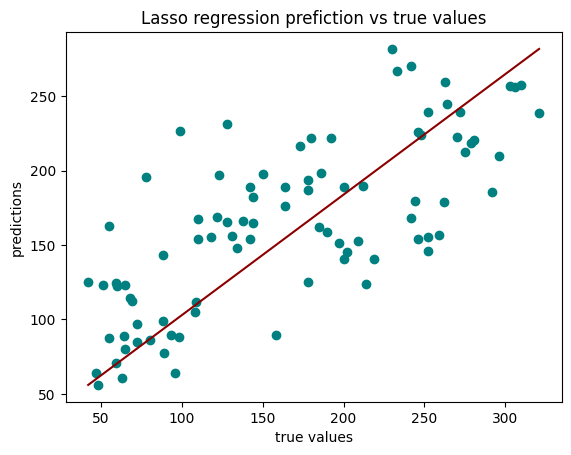

In [ ]:
# 4
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Model
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)

# Predict
y_pred = lasso.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# Plotting
plt.scatter(y_test, y_pred, color='teal')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='darkred')
plt.xlabel('true values')
plt.ylabel('predictions')
plt.title('Lasso regression prefiction vs true values')
plt.show()

In [ ]:
# 5
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge

# Prepare data
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1)
model.fit(x, y)

# Output the coefficients and the model score
print('Coefficientes:', model.coef_)
print('Intercept:', model.intercept_)
print('R2 score:', model.score(x, y))

Coefficientes: [   1.30870543 -207.19241786  489.69517109  301.76405786  -83.46603399
  -70.8268319  -188.67889782  115.7121356   443.81291747   86.7493154 ]
Intercept: 152.13348416289602
R2 score: 0.5125619902742506


In [ ]:
# 6
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Prepare data
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Define a range of alpha values for Ridge regression
alpha_range = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize ridge model
ridge = Ridge()

# Initialize GridSearchCV to find the best alpha
grid = GridSearchCV(estimator=ridge, param_grid=alpha_range, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid.fit(x, y)

# Best alpha values
print('Best alpha value found:', grid.best_params_)
print('Best score:', grid.best_score_)

Best alpha value found: {'alpha': 0.01}
Best score: -2997.6917496038063


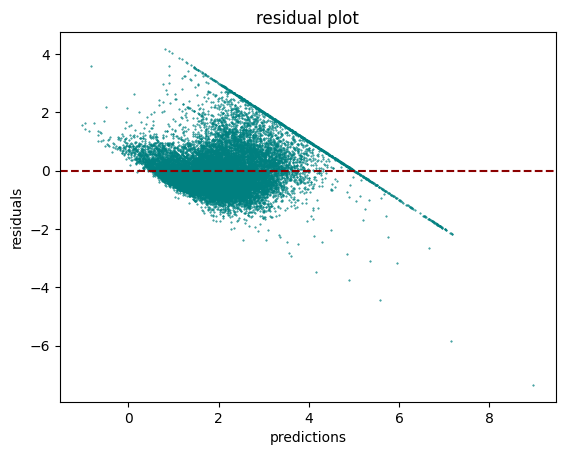

In [1]:
# 7
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Prepare data
california = fetch_california_housing()
x = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Model
model = LinearRegression()
model.fit(x, y)
predictions = model.predict(x)

# Residuals
residuals = y - predictions

# Plot
plt.scatter(predictions, residuals, color='teal', s=0.2)
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.title('residual plot')
plt.axhline(y=0, color='darkred', linestyle='--')
plt.show()

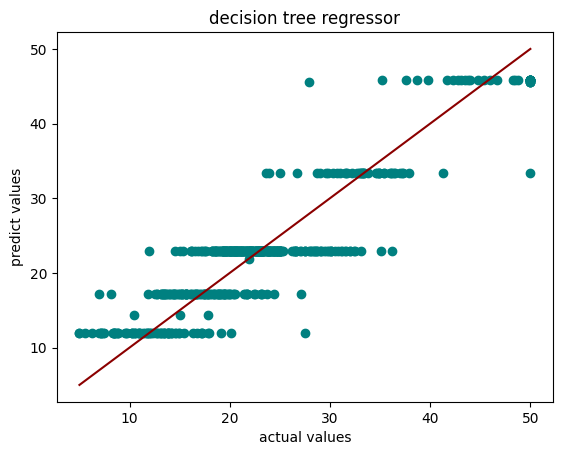

In [45]:
# 8
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml

# Load data
boston = fetch_openml('boston', version=1, parser='auto')
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Model
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(x, y)

# Predictions
predictions = tree_model.predict(x)

# Plot
plt.scatter(y, predictions, color='teal')
plt.xlabel('actual values')
plt.ylabel('predict values')
plt.title('decision tree regressor')
plt.plot([min(y), max(y)], [min(y), max(y)], color='darkred')
plt.show()

In [46]:
# 9
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_openml

# Load data
boston = fetch_openml('boston', version=1, parser='auto')
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Models
linear_regression = LinearRegression()
ridge = Ridge()
tree_regression = DecisionTreeRegressor()
linear_regression.fit(x.values, y)
ridge.fit(x.values, y)
tree_regression.fit(x.values, y)

# Predictions
linear_regression_prediction = linear_regression.predict(x.values)
ridge_prediction = ridge.predict(x.values)
tree_regression_prediction = tree_regression.predict(x.values)

# Output
print('Linear Regression - R2 Score:', r2_score(y, linear_regression_prediction))
print('Linear Regression - MSE:', mean_squared_error(y, linear_regression_prediction))

print('Ridge Regression - R2 Score:', r2_score(y, ridge_prediction))
print('Ridge Regression - MSE:', mean_squared_error(y, ridge_prediction))

print('Decision Tree - R2 Score:', r2_score(y, tree_regression_prediction))
print('Decision Tree - MSE:', mean_squared_error(y, tree_regression_prediction))

Linear Regression - R2 Score: 0.7406426641094095
Linear Regression - MSE: 21.894831181729202
Ridge Regression - R2 Score: 0.7388703133867616
Ridge Regression - MSE: 22.04445224308819
Decision Tree - R2 Score: 1.0
Decision Tree - MSE: 0.0


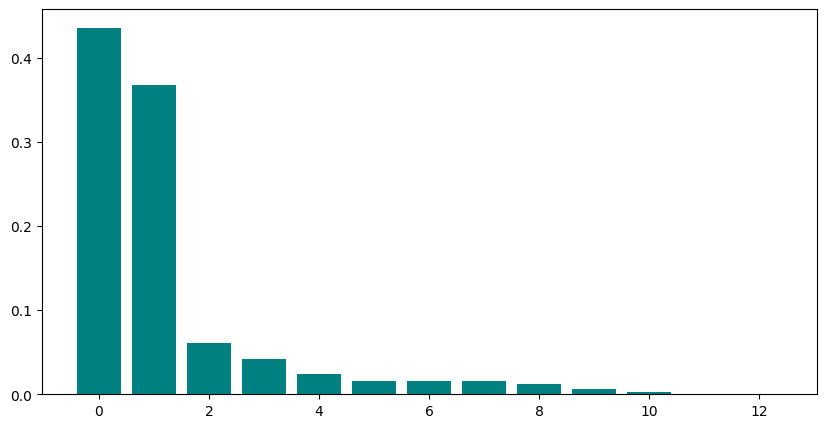

feature rankings:
1. feature RM (0.43602904989584124)
2. feature LSTAT (0.36735418755320715)
3. feature DIS (0.061159884281149636)
4. feature CRIM (0.042031661688275795)
5. feature NOX (0.02384896501358313)
6. feature PTRATIO (0.01604019848315072)
7. feature TAX (0.015627164127644932)
8. feature AGE (0.015216858538515477)
9. feature B (0.012490580146878092)
10. feature INDUS (0.0057711023889300715)
11. feature RAD (0.0029120954660545074)
12. feature ZN (0.0009028484938762862)
13. feature CHAS (0.0006154039228929079)


In [82]:
# 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor

# Load data
boston = fetch_openml('boston', version=1, parser='auto')
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Model
model = RandomForestRegressor(n_estimators=100)
model.fit(x.values, y)

# Feature importance
feature_importances = model.feature_importances_
features = boston.feature_names

# Sorting the features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = feature_importances[indices]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(indices)), sorted_importances, color='teal', align='center')
plt.show()

print('feature rankings:')
for i in range(x.shape[1]):
  print(f'{i + 1}. feature {features[indices[i]]} ({feature_importances[indices[i]]})')